#  Dataset de Kaggle
https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4/input


La efectividad del sistema de predicción de cáncer ayuda a las personas a conocer su riesgo de cáncer a bajo costo y también les ayuda a tomar la decisión apropiada basada en su estado de riesgo de cáncer.


Total no. of attributes:16 No .of instances:284 Attribute information: 1. Gender: M(male), F(female) 2. Age: Age of the patient 3. Smoking: YES=2 , NO=1. 4. Yellow fingers: YES=2 , NO=1. 5. Anxiety: YES=2 , NO=1. 6. Peer_pressure: YES=2 , NO=1. 7. Chronic Disease: YES=2 , NO=1. 8. Fatigue: YES=2 , NO=1. 9. Allergy: YES=2 , NO=1. 10. Wheezing: YES=2 , NO=1. 11. Alcohol: YES=2 , NO=1. 12. Coughing: YES=2 , NO=1. 13. Shortness of Breath: YES=2 , NO=1. 14. Swallowing Difficulty: YES=2 , NO=1. 15. Chest pain: YES=2 , NO=1. 16. Lung Cancer: YES , NO.

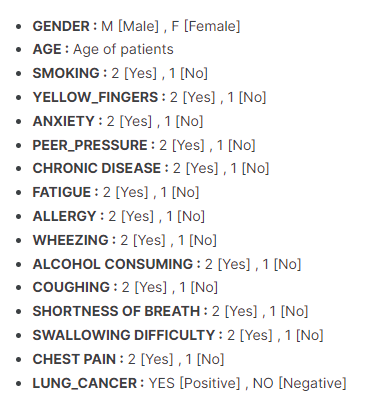

### Importamos las librerías necesarias

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import neighbors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import f_classif
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)

### Cargamos el dataset

In [147]:
df = pd.read_csv('https://raw.githubusercontent.com/carolProg/SNS_23_24/main/ACT_3_4_PROYECTO/surveylungcancer.csv')

df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


En este dataset YES=2 y NO=1

In [148]:
df.shape

(309, 16)

In [149]:
# Vemos todas las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Categorizar y normalizar datos

In [150]:
# Comprobamos los duplicados
df.duplicated().sum()

33

In [151]:
# Eliminamos los duplicados
df=df.drop_duplicates()

In [152]:
# Comprobamos si hay valores nulos en el dataset.
df.isnull().sum()


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [153]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [154]:
# Borramos las filas con valores nulos
df = df.dropna()

En este conjunto de datos, los atributos GENDER & LUNG_CANCER son de tipo objeto. Por lo tanto, vamos a convertirlos en valores numéricos utilizando **LabelEncoder** de sklearn. LabelEncoder es una clase de utilidad para ayudar a normalizar las etiquetas de tal manera que sólo contengan valores entre 0 y n_classes-1. También se puede utilizar para transformar etiquetas no numéricas (siempre y cuando sean hash y comparables) en etiquetas numéricas. También vamos a hacer todos los demás atributos como YES=1 y NO=0.

In [155]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [156]:
# Comprobamos el dataset
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


**Nota: Hombre=1 y Mujer=0. Para las otras variables YES=1 y NO=0**

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


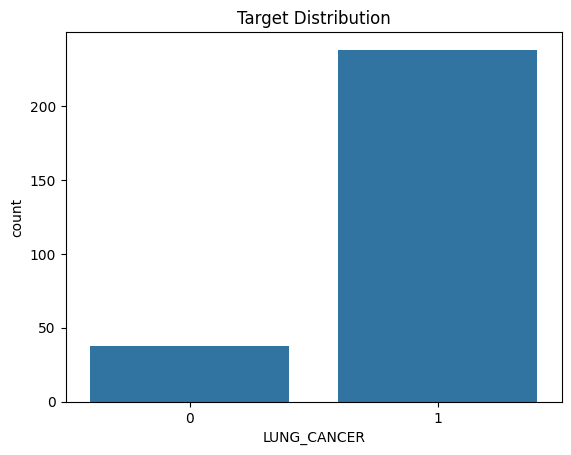

In [158]:
# Comprobamos la distribución de la variable objetivo
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

###La distribución de la variable objetivo está desbalanceada###

In [159]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

### Tenemos que balancear los datos antes de aplicar los algoritmos###

Ahora vamos a hacer algunas visualizaciones de datos para la mejor comprensión de cómo las características independientes están relacionados con la variable objetivo.

In [160]:
# Función para graficar
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

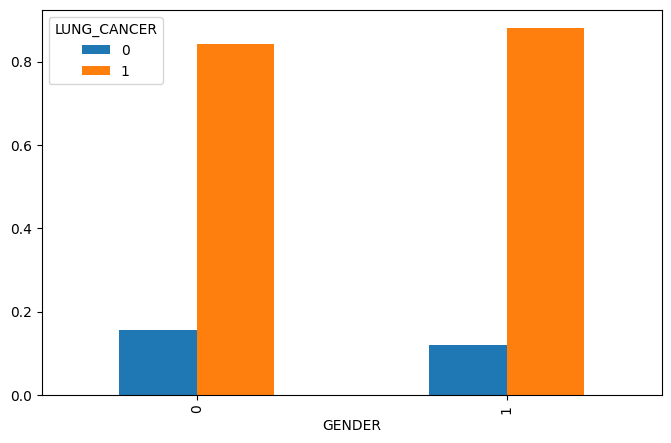

In [161]:
plot('GENDER')

<Axes: xlabel='AGE'>

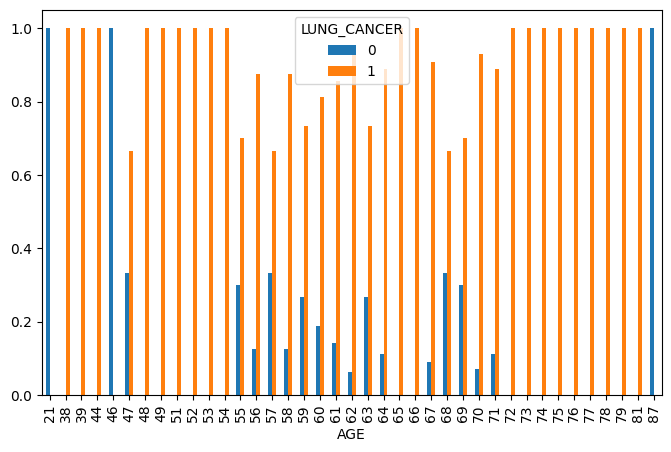

In [162]:
plot('AGE')

<Axes: xlabel='SMOKING'>

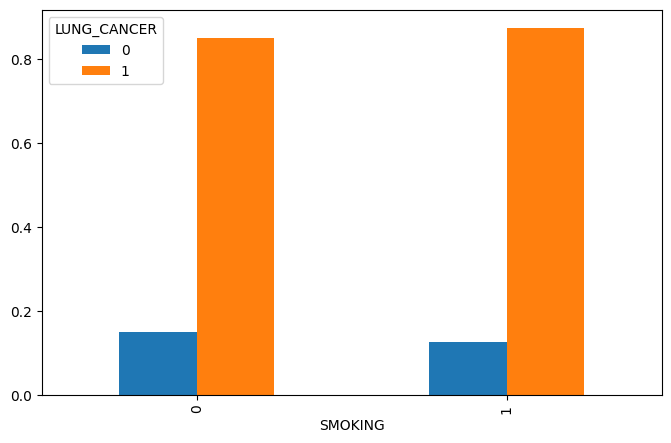

In [163]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

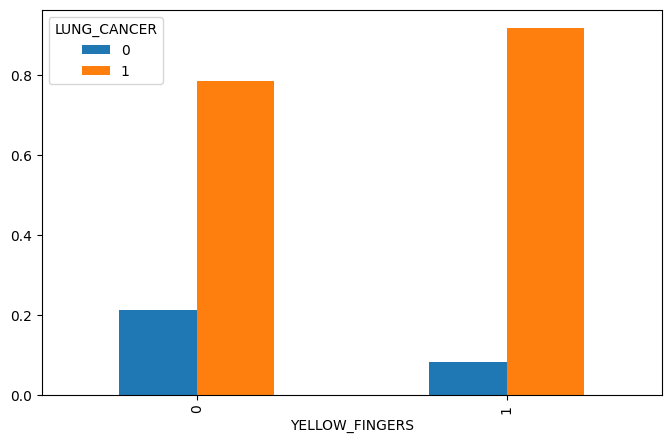

In [164]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

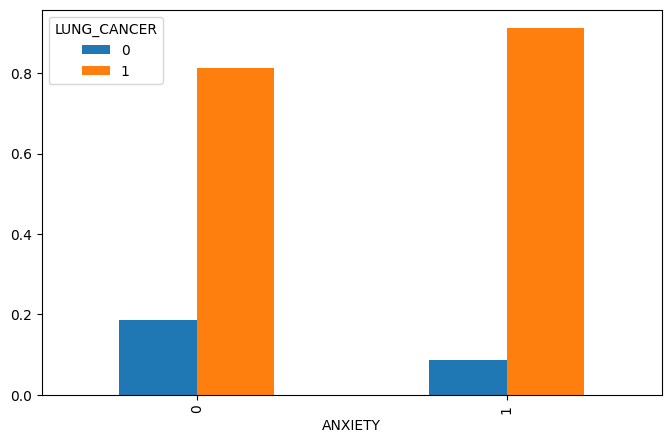

In [165]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

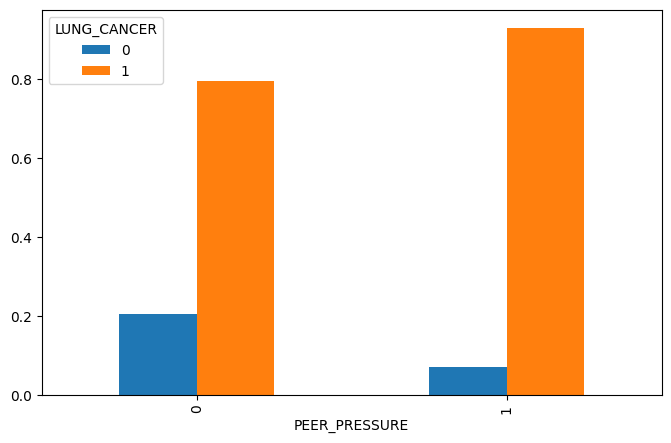

In [166]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

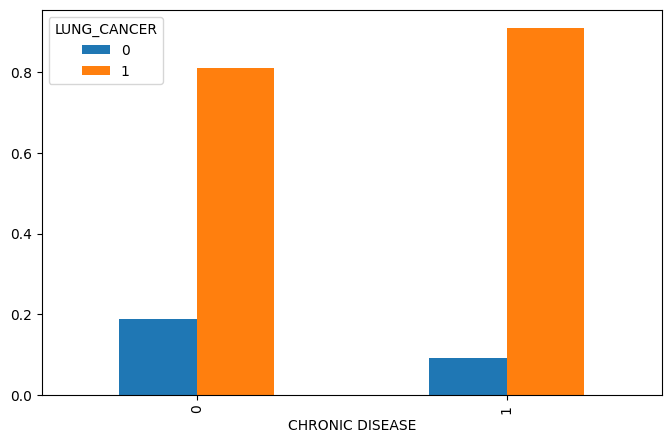

In [167]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

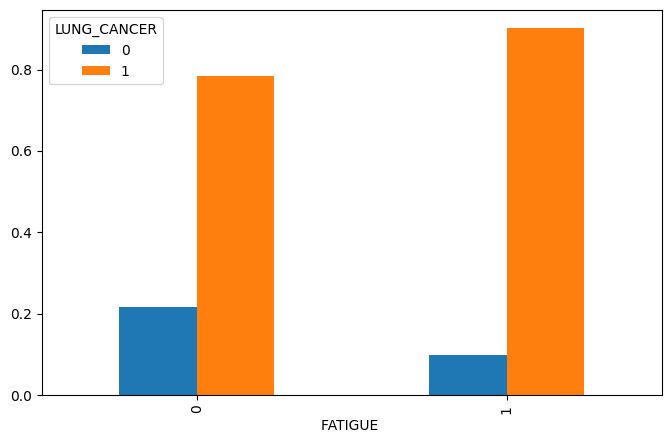

In [168]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

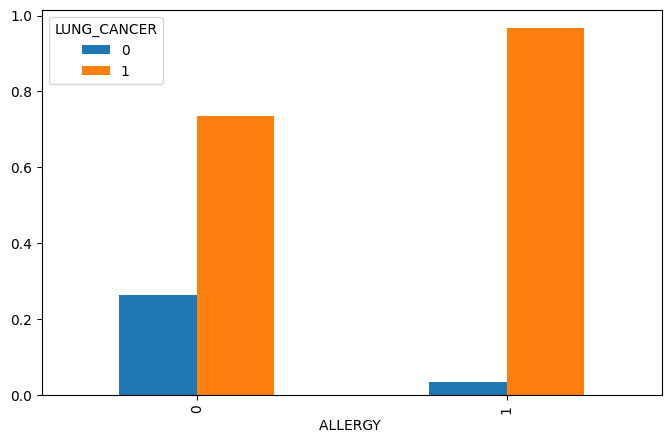

In [169]:
plot('ALLERGY ')

<Axes: xlabel='WHEEZING'>

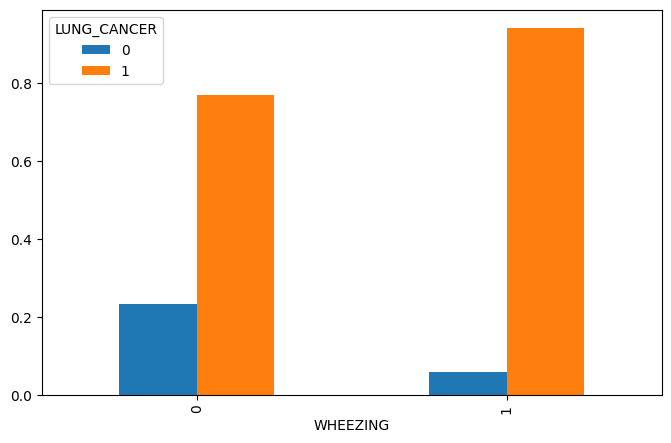

In [170]:
plot('WHEEZING')

<Axes: xlabel='ALCOHOL CONSUMING'>

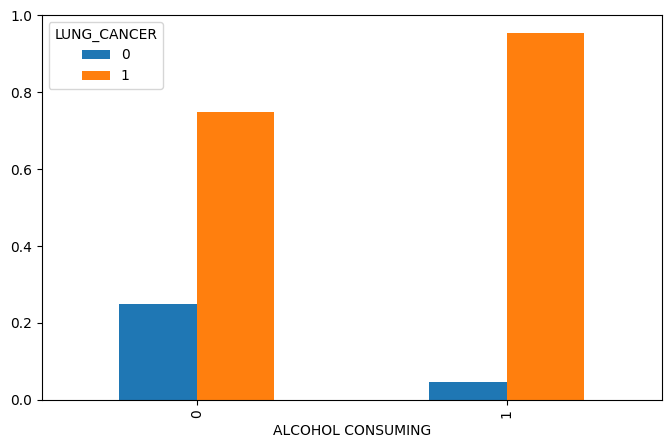

In [171]:
plot('ALCOHOL CONSUMING')

<Axes: xlabel='COUGHING'>

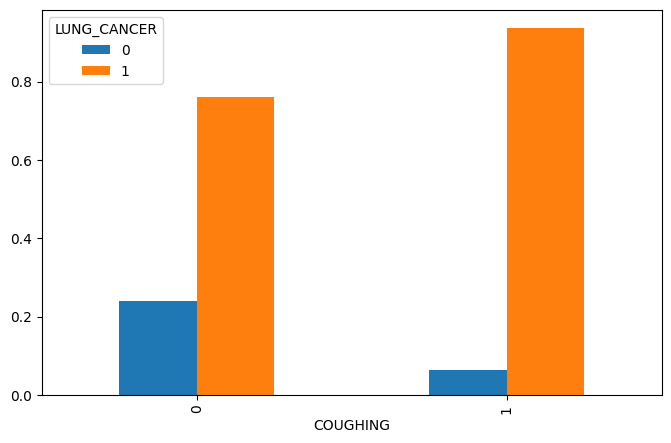

In [172]:
plot('COUGHING')

<Axes: xlabel='SHORTNESS OF BREATH'>

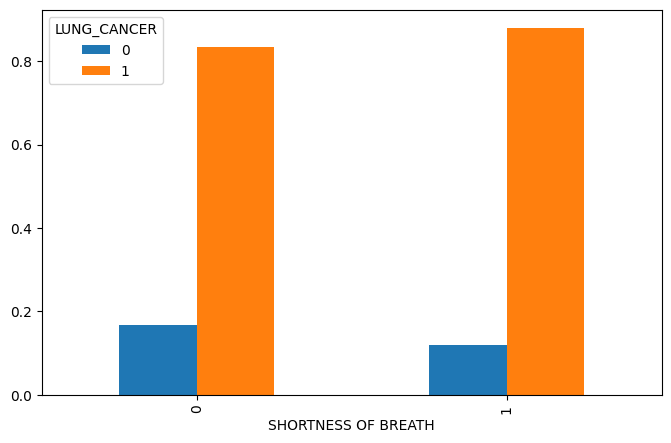

In [173]:
plot('SHORTNESS OF BREATH')

<Axes: xlabel='SWALLOWING DIFFICULTY'>

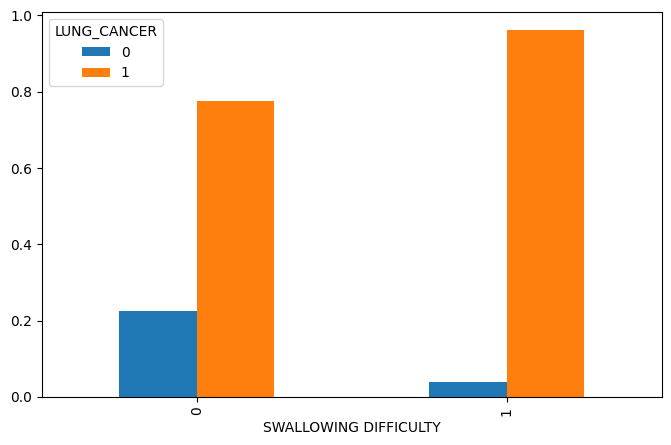

In [174]:
plot('SWALLOWING DIFFICULTY')

<Axes: xlabel='CHEST PAIN'>

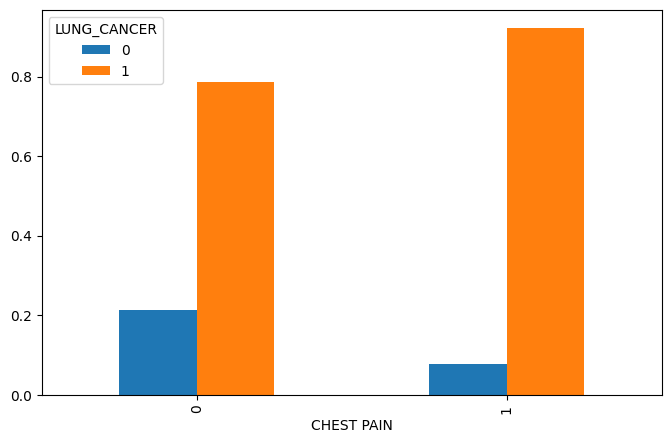

In [175]:
plot('CHEST PAIN')

##**Gráfico de Dispersión**

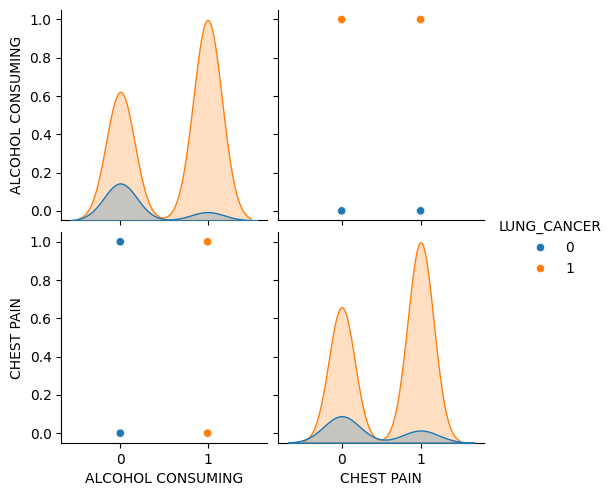

In [176]:
data_pairplots = df[['ALCOHOL CONSUMING', 'CHEST PAIN','LUNG_CANCER']]
sns.pairplot(data_pairplots, hue='LUNG_CANCER')
plt.show()

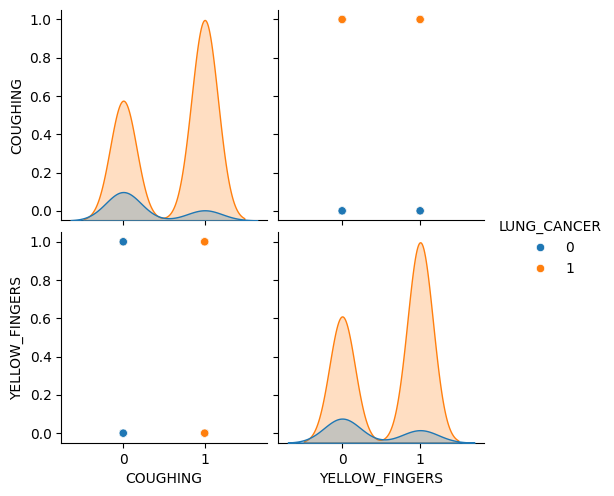

In [177]:
data_pairplots = df[['COUGHING', 'YELLOW_FINGERS', 'LUNG_CANCER']]
sns.pairplot(data_pairplots, hue='LUNG_CANCER')
plt.show()

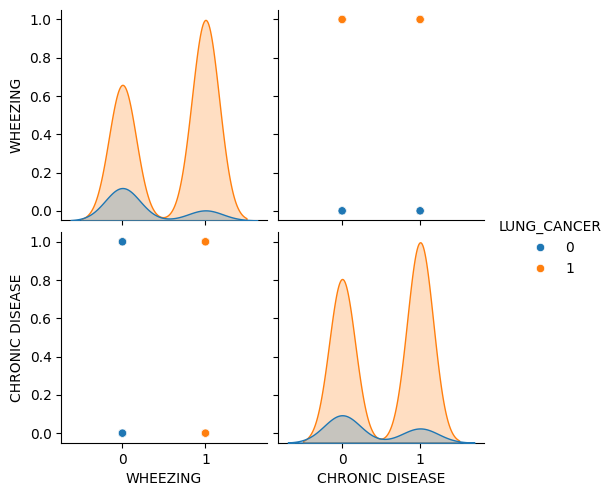

In [178]:
data_pairplots = df[['WHEEZING', 'CHRONIC DISEASE','LUNG_CANCER']]
sns.pairplot(data_pairplots, hue='LUNG_CANCER')
plt.show()

A partir de las visualizaciones, está claro que en el conjunto de datos dado, las características GÉNERO, EDAD, FUMADOR y RESPIRACIÓN CORTA no tienen mucha relación con el CÁNCER DE PULMÓN. Así que vamos a eliminar esas características para hacer este conjunto de datos más limpio.

In [179]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


##**Gráfico de Correlación**##

In [180]:
# Calculamos la correlación
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


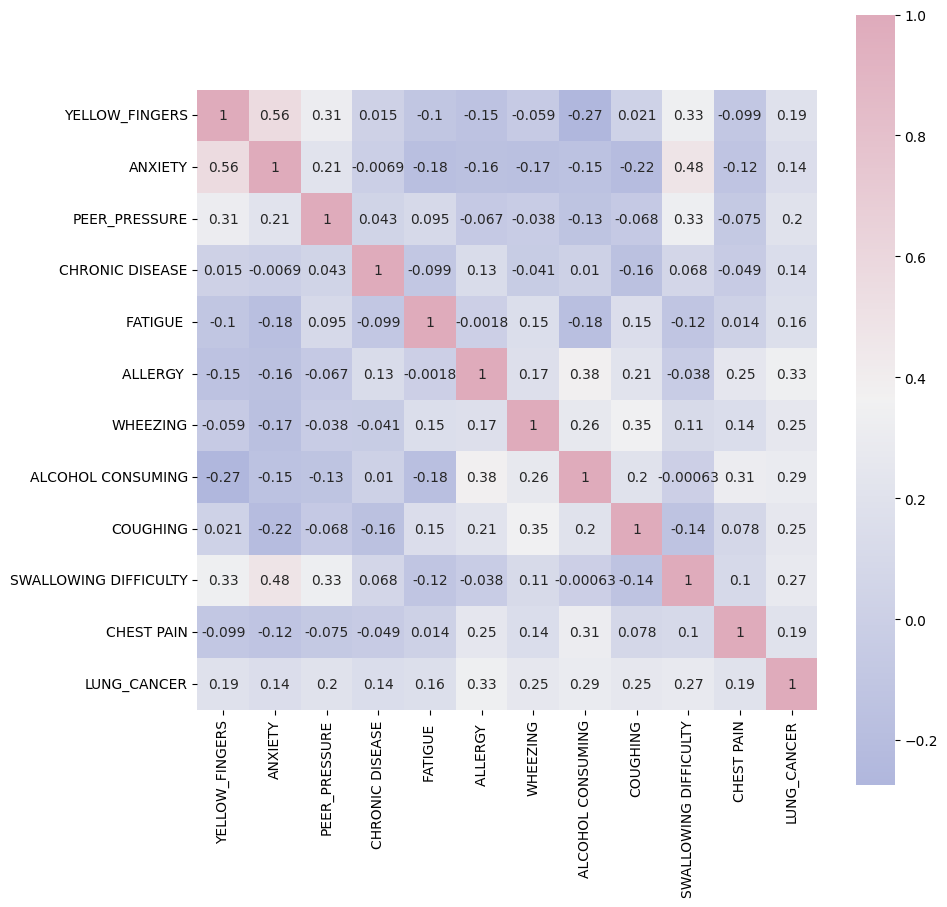

In [181]:
# Matriz de Correlación
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(10,10))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

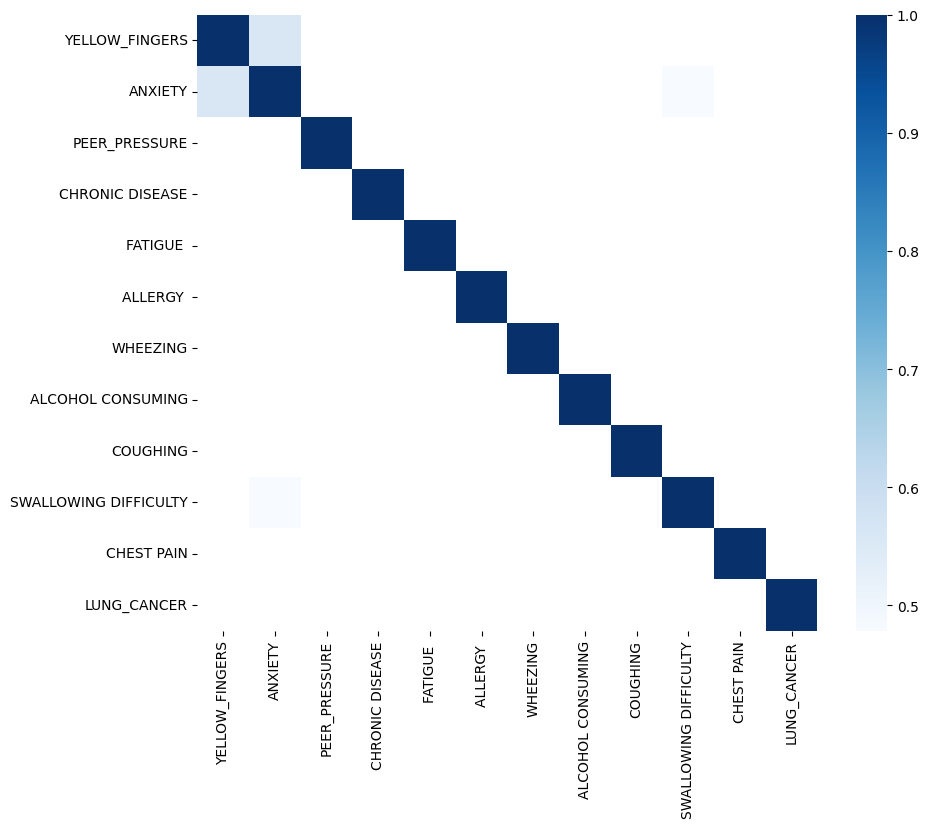

In [182]:
# Creamos una matriz que contiene solo las correlaciones fuertes (es decir, aquellas con un valor de 0.40 o más)
kot = cn[cn>=.40]
plt.figure(figsize=(10,8))
sns.heatmap(kot, cmap="Blues")

La matriz de correlaciones muestra que la ANSIEDAD y los DEDOS AMARILLOS están correlacionados en más de un 50%. Por lo tanto, vamos a crear una nueva característica combinándolos.

In [183]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1


In [184]:
# Dividimos las variables dependientes y las independientes
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

## Balanceado de datos##

In [185]:
# Importación de ADASYN
# Esta línea importa la clase ADASYN de la biblioteca imblearn. imblearn (Imbalanced-learn) es una biblioteca de Python que ofrece varias técnicas para tratar
# con conjuntos de datos desbalanceados, especialmente útil en problemas de clasificación donde el número de muestras en cada clase no es igual. ADASYN (Adaptive Synthetic Sampling) es una de estas técnicas.
from imblearn.over_sampling import ADASYN

# Aquí, se crea una instancia de ADASYN, especificando un random_state para asegurar la reproducibilidad. Al fijar el random_state, garantizas que el método produzca los mismos resultados cada vez que se ejecute con los mismos datos.
# ADASYN genera muestras sintéticas de las clases minoritarias para equilibrar el conjunto de datos.
adasyn = ADASYN(random_state=42)

# Aplicación de ADASYN para remuestrear los datos
X, y = adasyn.fit_resample(X, y)
# En esta línea, el método fit_resample se aplica a los conjuntos de datos de características X y de etiquetas y. Lo que hace es ajustar el modelo ADASYN a los datos y luego remuestrear el conjunto de datos para abordar el desequilibrio de clases. El resultado son dos conjuntos de datos: X e y, que ahora están balanceados.
# X contiene las características remuestreadas, e y contiene las etiquetas correspondientes. El balance se logra creando nuevas muestras sintéticas de las clases minoritarias basadas en las muestras originales, de modo que las clases estén más equilibradas.

In [186]:
len(X)

477

##**SelectKBest**##

In [187]:
from sklearn.feature_selection import SelectKBest, f_classif

# Definimos y aplicamos SelectKBest
# Por ejemplo, seleccionaremos las 10 mejores características basadas en la prueba ANOVA F
k = 10  # Número de características a seleccionar
select_k_best = SelectKBest(score_func=f_classif, k=k)
X_selected_features = select_k_best.fit_transform(X, y)

# Para obtener los nombres de las características seleccionadas
selected_indices = select_k_best.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]

print("Las características seleccionadas son:")
for feature_name in selected_feature_names:
    print(feature_name)

Las características seleccionadas son:
YELLOW_FINGERS
ANXIETY
PEER_PRESSURE
ALLERGY 
WHEEZING
ALCOHOL CONSUMING
COUGHING
SWALLOWING DIFFICULTY
CHEST PAIN
ANXYELFIN


##**Conclusión**
- Importancia de las características: Las características seleccionadas probablemente tienen una fuerte relación con la presencia de cáncer de pulmón según los datos. Esto no implica causalidad, pero sí que existe una asociación estadística que podría ser útil para la construcción de modelos predictivos.

- Relevancia clínica: Varias de las características seleccionadas (como la tos, dificultad para tragar y dolor en el pecho) están clínicamente asociadas con síntomas de cáncer de pulmón, lo que sugiere que el modelo está recogiendo señales relevantes desde un punto de vista médico.

- Factores de estilo de vida: La inclusión de 'YELLOW_FINGERS', 'ALCOHOL_CONSUMING', y 'PEER_PRESSURE' sugiere que los factores de estilo de vida que podrían estar indirectamente relacionados con el hábito de fumar o el consumo de alcohol también están asociados con la variable objetivo, lo que refleja hallazgos conocidos en la literatura médica sobre los riesgos de cáncer de pulmón.

In [190]:
# Dividimos los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

## **Naive Bayes sin Cross Validation**

##**Gaussian Naive Bayes**

In [191]:
# Ajustando el clasificador Gaussian Naive Bayes a los datos de entrenamiento
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [192]:
# Predecimos los resultados usando los datos de prueba
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [194]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
# Precisión del modelo
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.88      0.95      0.91        56

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



Este modelo tiene un 92% de precisión

## **Multinomial Naive Bayes**

In [195]:
# Ajustamos el clasificador Multinomial Naive Bayes a los datos de entrenamiento

mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [196]:
# Predecimos el resultado con los datos de text
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [197]:
# Precisión del modelo
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        64
           1       0.75      0.89      0.81        56

    accuracy                           0.81       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.82      0.81      0.81       120



Este modelo tiene un 81% de precisión

#**Bernoulli Naive Bayes**

In [198]:
# Ajustamos el clasificador de Bernoulli Naive Bayes a  los datos de entrenamiento

bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

BernoulliNB()

In [199]:
# Predecimos el resultado usando datos de test
y_bnb_pred= bnb_model.predict(X_test)
y_bnb_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [200]:
# Precisión del modelo
bnb_cr=classification_report(y_test, y_bnb_pred)
print(bnb_cr)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        64
           1       0.90      0.98      0.94        56

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120



Este modelo tiene un 94% de precisión

#**Complement Naive Bayes**

In [201]:
# Ajustamos clasificador Complement Naive Bayes a los datos de entrenamiento
conb_model = ComplementNB()
conb_model.fit(X_train, y_train)

ComplementNB()

In [202]:
# Predecimos el resultado mediante datos de test
y_conb_pred= conb_model.predict(X_test)
y_conb_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [203]:
# Precisión del modelo
conb_cr=classification_report(y_test, y_conb_pred)
print(conb_cr)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        64
           1       0.77      0.84      0.80        56

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



Este modelo tiene un 81% de precisión

#**Categorical Naive Bayes**

In [204]:
# Ajustamos el clasificador Categorical Naive Bayes a los datos de entrenamiento
cnb_model = CategoricalNB()
cnb_model.fit(X_train, y_train)

CategoricalNB()

In [205]:
# Predecimos resultados usnado datos de test
y_cnb_pred= cnb_model.predict(X_test)
y_cnb_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [206]:
# Precisión del modelo
cnb_cr=classification_report(y_test, y_cnb_pred)
print(cnb_cr)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        64
           1       0.90      0.98      0.94        56

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120



Este modelo tiene un 94% de precisión

In [207]:
# Función para la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):

    if not title:
        if normalize:
            title = 'Matriz de confusión normalizada'
        else:
            title = 'Matriz de confusión sin normalización'

    cm = confusion_matrix(y_true, y_pred)

    # Usamos las etiquetas que aparecen en los datos
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Iteramos con las dimensiones de los datos
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

Matriz de confusión, sin normalización
[[57  7]
 [ 3 53]]


<Axes: title={'center': 'Matriz de confusión sin normalización'}, xlabel='Predicted label', ylabel='True label'>

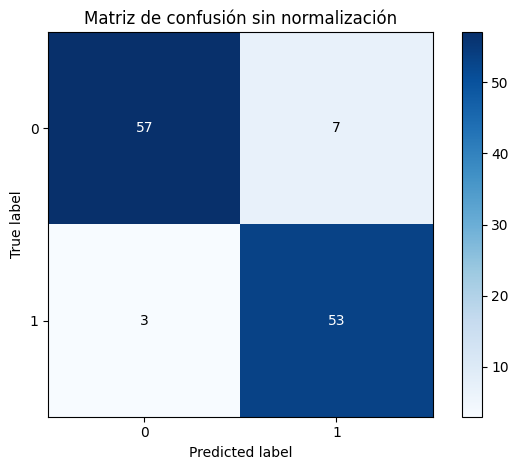

In [208]:
# Matriz de confusión con implementación GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

Matriz de confusión, sin normalización
[[47 17]
 [ 6 50]]


<Axes: title={'center': 'Matriz de confusión sin normalización'}, xlabel='Predicted label', ylabel='True label'>

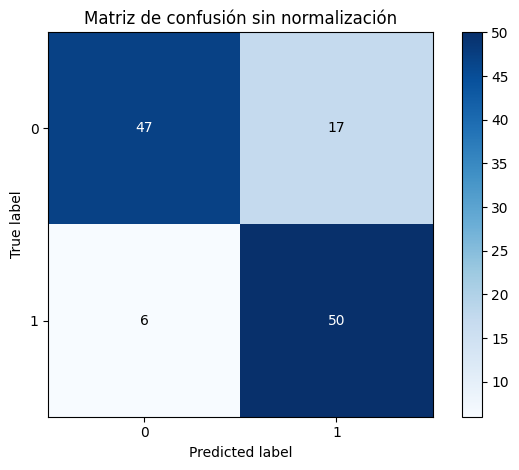

In [209]:
# Matriz de confusión con implementación MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

Matriz de confusión, sin normalización
[[58  6]
 [ 1 55]]


<Axes: title={'center': 'Matriz de confusión sin normalización'}, xlabel='Predicted label', ylabel='True label'>

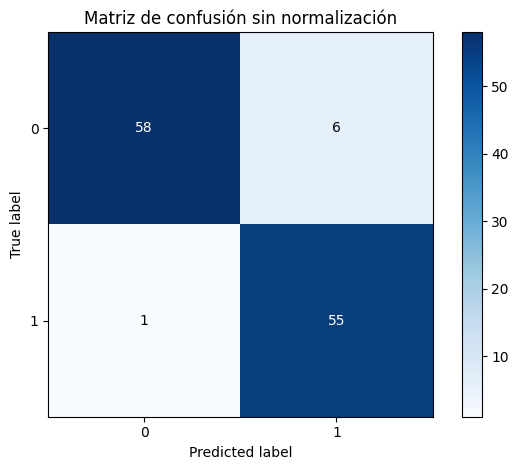

In [210]:
# Matriz de confusión con implementación BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

Matriz de confusión, sin normalización
[[50 14]
 [ 9 47]]


<Axes: title={'center': 'Matriz de confusión sin normalización'}, xlabel='Predicted label', ylabel='True label'>

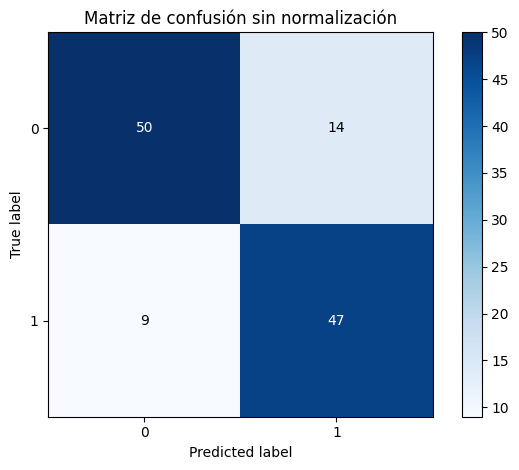

In [211]:
# Matriz de confusión con implementación ComplementNB
clf = ComplementNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

Matriz de confusión, sin normalización
[[58  6]
 [ 1 55]]


<Axes: title={'center': 'Matriz de confusión sin normalización'}, xlabel='Predicted label', ylabel='True label'>

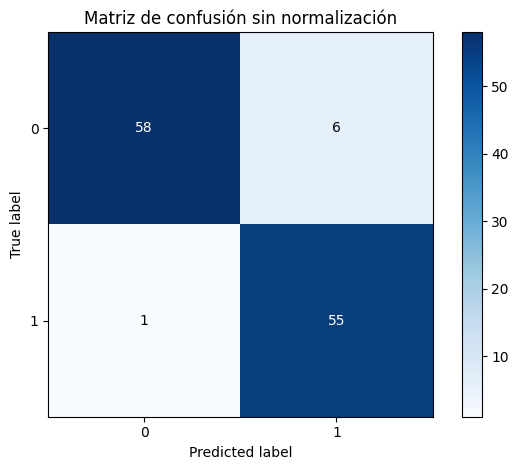

In [212]:
# Matriz de confusión con implementación CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

##**Naive Bayes con Cross Validation**

In [213]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Gaussian naive bayes
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Bernoulli naive bayes
bnb_model_scores = cross_val_score(bnb_model,X, y, cv=kf)

# Complement naive bayes
conb_model_scores = cross_val_score(conb_model,X, y, cv=kf)

# Categorical naive bayes
cnb_model_scores = cross_val_score(cnb_model,X, y, cv=kf)


print("Gaussian naive bayes precisión media:", np.mean(gnb_model_scores))
print("Multinomial naive bayes precisión media:", np.mean(mnb_model_scores))
print("Bernoulli naive bayes precisión media:", np.mean(bnb_model_scores))
print("Complement naive bayes precisión media:", np.mean(conb_model_scores))
print("Categorical naive bayes precisión media:", np.mean(cnb_model_scores))

Gaussian naive bayes precisión media: 0.8846187943262411
Multinomial naive bayes precisión media: 0.7421542553191489
Bernoulli naive bayes precisión media: 0.9328900709219858
Complement naive bayes precisión media: 0.7505319148936171
Categorical naive bayes precisión media: 0.9328900709219858


##**Naive Bayes con Cross Validation y StratifiedKFold**

La validación cruzada Stratified K-Fold es una herramienta poderosa para evaluar el rendimiento de modelos de aprendizaje automático en conjuntos de datos desbalanceados. Puede ayudar a asegurar que el rendimiento del modelo sea estimado de manera precisa y que el modelo sea robusto a desequilibrios de clase en el conjunto de datos.

In [214]:
# K-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k = 10
kf = StratifiedKFold(n_splits=k)

# Gaussian naive bayes
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Bernoulli naive bayes
bnb_model_scores = cross_val_score(bnb_model,X, y, cv=kf)

# Complement naive bayes
conb_model_scores = cross_val_score(conb_model,X, y, cv=kf)

# Categorical naive bayes
cnb_model_scores = cross_val_score(cnb_model,X, y, cv=kf)

print("Gaussian naive bayes precisión media:", np.mean(gnb_model_scores))
print("Multinomial naive bayes precisión media:", np.mean(mnb_model_scores))
print("Bernoulli naive bayes precisión media:", np.mean(bnb_model_scores))
print("Complement naive bayes precisión media:", np.mean(conb_model_scores))
print("Categorical naive bayes precisión media:", np.mean(cnb_model_scores))


Gaussian naive bayes precisión media: 0.8870124113475178
Multinomial naive bayes precisión media: 0.7572251773049644
Bernoulli naive bayes precisión media: 0.9184397163120568
Complement naive bayes precisión media: 0.7572251773049644
Categorical naive bayes precisión media: 0.9184397163120568


## **Conclusiones**
- **Diferencia en el Rendimiento**: Las métricas de precisión obtenidas de los modelos sin validación cruzada tienden a ser más optimistas en comparación con los obtenidos a través de la validación cruzada. Esto es evidente en los resultados del clasificador Gaussian Naive Bayes, donde la precisión pasa de un 92% sin validación cruzada a aproximadamente un 88% con K-Fold y a aproximadamente un 87% con Stratified K-Fold.
Este fenómeno también se observa en los otros clasificadores (Multinomial, Bernoulli, Complement y Categorical), aunque la disminución es variable.


- **Robustez del Modelo**: La validación cruzada, especialmente la estratificada, ofrece una visión más realista y robusta del rendimiento del modelo porque evalúa el modelo en varios subconjuntos del conjunto de datos. Esto ayuda a prevenir el optimismo del rendimiento debido al sobreajuste en una única división de entrenamiento-prueba.
Los clasificadores de Naive Bayes que mantienen un rendimiento similar en ambas versiones de validación cruzada (K-Fold y Stratified K-Fold) pueden considerarse más estables y potencialmente más confiables.

- **Consistencia en la Evaluación**: La consistencia entre las métricas de precisión obtenidas a través de la validación cruzada regular y la estratificada puede ser un indicativo de que la proporción de clases no tiene un efecto significativo en el rendimiento del modelo. Sin embargo, la validación cruzada estratificada sigue siendo la opción preferible en la mayoría de los casos, especialmente en conjuntos de datos desbalanceados.

- **Mejor Modelo para el Conjunto de Datos**: El modelo Bernoulli Naive Bayes muestra un rendimiento destacado con una precisión del 94% tanto en la evaluación sin validación cruzada como en la estratificada, lo que sugiere que puede ser el más adecuado para este conjunto de datos específico.

En resumen, los resultados de la validación cruzada proporcionan una estimación más fiable del rendimiento de los modelos y deben ser preferidos sobre una única división de entrenamiento-prueba, especialmente cuando se trabaja con conjuntos de datos que pueden tener desequilibrios de clase. Los resultados también destacan la importancia de elegir el clasificador adecuado en función de las características del conjunto de datos para obtener el mejor rendimiento posible.

# **SEGUNDA PARTE ACTIVIDAD 3.4**

# **PROYECTO**

#**Regresión Logística**#

In [215]:
# Dividimos los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [216]:
# Ajustamos los datos de entrenamiento al modelo
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [217]:
# Predecimos los resultados con los datos de prueba
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [218]:
# Precisión del modelo
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.95      0.97        56

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



Este modelo tiene cerca del 97% de precisión

#**Árbol de decisión**#

In [219]:
# Ajustamos los datos de entrenamiento al modelo
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [220]:
# Predecimos los resultadoscon los datos de pruebas
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [221]:
# Precisión del modelo
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.96      0.91      0.94        56

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



Este modelo tiene un 94% de precisión

#**K Nearest Neighbor**

In [222]:
# Ajustamos clasificador K-NN a los datos de entrenamiento
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [223]:
# Predecir resultados mediante datos de test
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [224]:
# Precisión del modelo
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        64
           1       1.00      0.91      0.95        56

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



Este modelo tiene un 96% de precisión

#**Support Vector Classifier**

In [225]:
# Ajustamos SVC a los datos de entrenamiento
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [226]:
# Predecimos los resultados usando datos de test
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [227]:
# Precisión del modelo
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Este modelo tiene un 98% de precisión.

#**Random Forest**

In [228]:
# Entrenamiento
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [229]:
# Predecimos resultados usando datos de test
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [230]:
# Precisión del modelo
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Este modelo tiene un 98% de precisión

#**XGBoost**

In [231]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [232]:
# Predecimos los resultados usando datos de test
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [233]:
# Precisión del modelo
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.96      0.98      0.97        56

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



Este modelo tiene un 97% de precisión

#**Multi-layer Perceptron classifier**

In [234]:
# Entrenamiento de un modelo neural network
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [235]:
# Predecimos los resultados con los datos de test
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [236]:
# Precisión del modelo
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Este modelo tiene un 98% de precisión

#**Gradient Boosting**

In [237]:
# Entrenamiento
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [238]:
# Predecimos resultados con los datos de test
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [239]:
# Precisión del modelo
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Este modelo tiene un 98% de precisión.



A partir de las precisiónes calculadas, está claro que los modelos SVC (Máquinas de Vectores de Soporte), Random Forest, Perceptrón Multicapa y Gradient Boost han funcionado al máximo nivel. Para evaluar de forma más eficiente estos modelos vamos a utilizar métodos de Validación Cruzada usando tanto K-Fold como Stratified K-Fold.

## **Cross Validation**

In [241]:
# K-Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Logistic regression model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)

print("Logistic regression models precisión media:", np.mean(lr_model_scores))
print("Decision tree model precisión media:", np.mean(dt_model_scores))
print("KNN models precisión media:", np.mean(knn_model_scores))
print("Support Vector Classifier models precisión media:", np.mean(svc_model_scores))
print("Random forest models precisión media:", np.mean(rf_model_scores))
print("XGBoost models precisión media:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models precisión media:", np.mean(mlp_model_scores))
print("Gradient boost models precisión media:", np.mean(gb_model_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Logistic regression models precisión media: 0.930895390070922
Decision tree model precisión media: 0.9539893617021278
KNN models precisión media: 0.9330673758865249
Support Vector Classifier models precisión media: 0.9497340425531917
Random forest models precisión media: 0.9519060283687942
XGBoost models precisión media: 0.9518617021276597
Multi-layer perceptron models precisión media: 0.9414007092198583
Gradient boost models precisión media: 0.9560726950354612



La validación cruzada K-Fold muestra que el modelo de Gradient Boost ofrece la mayor precisión, con un 95.6%, y el modelo de Árbol de Decisión también ofrece una precisión casi igual.

In [242]:
# K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k = 10
kf = StratifiedKFold(n_splits=k)

# Logistic regression model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)

print("Logistic regression models precisión media:", np.mean(lr_model_scores))
print("Decision tree models precisión media:", np.mean(dt_model_scores))
print("KNN models precisión media:", np.mean(knn_model_scores))
print("Support Vector Classifier models precisión media:", np.mean(svc_model_scores))
print("Random forest models precisión media:", np.mean(rf_model_scores))
print("XGBoost models precisión media:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models precisión media:", np.mean(mlp_model_scores))
print("Gradient boost models precisión media:", np.mean(gb_model_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Logistic regression models precisión media: 0.9288120567375886
Decision tree models precisión media: 0.9227393617021278
KNN models precisión media: 0.9184397163120567
Support Vector Classifier models precisión media: 0.9476063829787235
Random forest models precisión media: 0.9477393617021278
XGBoost models precisión media: 0.9436613475177305
Multi-layer perceptron models precisión media: 0.9434840425531915
Gradient boost models precisión media: 0.947695035460993



La validación cruzada Stratified K-Fold muestra que el modelo de Random Forest ofrece la mayor precisión, con un 94.6%, y otros modelos como Gradient Boost, Support Vector Classifier, XGBoost ofrecen precisión casi igual, mientras que el modelo Multinomial Naive Bayes da la menor precisión de 75.7%.

## Finalmente

In [253]:
  import joblib

In [254]:
  # Exportamos el modelo a un fichero . pkl

  joblib.dump(rf_model,'LC_modelo.pkl')

['LC_modelo.pkl']